In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display

# Taylor series

## Abstract

We are looking at the Taylor series, in more detail, we will see what taylor series is, see how we approximate a function, look at some examples, what is an error bound of an approximation and how do we estimate it, what does it mean for an approximation to converge or diverge and when does each happen. I have made a lot of examples, because I belive that is the easiest way to learn new things. Made function that plot the normal function and its Taylor series and at the end display both function, the normal one and the approximating one, then a function which found the maximum error of an approximation and finally, a function that found whether the approximating function converged or diverged. 

## Introduction

### What is taylor series?

The Taylor series is a mathematical representation of a function as an infinite sum of terms. It provides a way to approximate a function by using its derivatives at a specific point. But what does it mean to approximate a function at a specific point? 

This means to find an estimation of the value of the function at that specific point. By approximating a function at a specific point, we can gain insight into the behavior of the function around that point, make predictions, and solve problems in various fields of mathematics, physics, engineering, and other disciplines. But why are we approximating them with polynomials, why are they useful?

When we think about it, their graph is continuous which helps us smoothly capture the behaviour of the original function. In addition, they are differentiable because you can differenciate a polynomial very easily and as many times as you want which helps us construct higher-order polynomial approximation. But how good is an approximation and can we approximate every function we want, you may ask?

Well, we can't represent every function as a polynomial. We know that the graph of a polynomial funciton is smooth, but what if our function had steps or discontinuities or what if it diverged (we will talk about this later). We can't represent non-analytic functions as polynomials, but we can approximate them. Let's see how it works.

### How do we approximate a function?

Take a function (for example $\cos{x}$) and let's try to approximate it with a plynomial degree 2: $$\cos{x} = c_0 + c_1x + c_2x^{2}$$

What we do is, we take the zero-th derivative and replace x with 0, then we get: $$\cos{0} = c_0$$

All the other terms cancel, because they have $x$ in them, which we replaced with 0, and we are left with $$c_0 = 1$$

Now we take the first derivative and replace x with 0 $$\frac{d\cos{x}}{dx} = 0 + c_1\frac{dx}{dx} + c_2\frac{d(x^{2})}{dx}$$

which simplifies to: $$-\sin{0} = 0 + c_1 + 2xc_2$$

when we subtitute in $x = 0$, we get $$c_1 = -\sin{0}$$

$$=> c_1 = 0$$

Now we get the second derivative of both sides: $$-\cos{0} = 0 + 0 + 2c_2$$

 $$=> c_2 = -\frac{1}{2}$$

When we combine all of these, we get that $$\cos{x} \approx 1 - \frac{x^{2}}{2}$$

And if we write down what we did, we can find the following formula: $$c_n = \frac{f^{(n)}(0)}{!n}$$

#### Examples

Now let's graph both functions to see how good of an approximation we've done

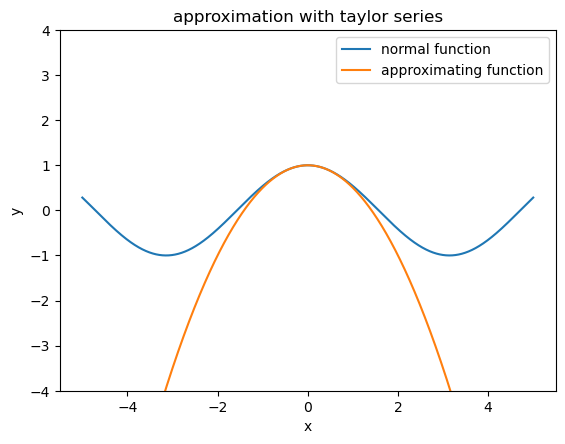

In [3]:
def plot_two_functions(f1, first_label, f2, second_label, title, x_range=[-5, 5], y_range=[-4, 4], num_points=5000):
    """
    Arguments:
    1. f1 - first function to plot
    2. first_label - the label of the first function
    3. f2 - the second functoin to plot
    4. second_label - the label of the second function
    5. title - the title of the plot
    6. x_range - a list/tuple which specifies the minimum value of x and the maximum value of x respectively
    7. y_range - a list/tuple which specifies the minimum value of y and the maximum value of y respectively
    8. The number of points to generate on the plot
        
    Plots two functions
    """
    x = np.linspace(-5, 5, 5000)
    f1_vectorized = np.vectorize(f1) # vectorizing the first function
    f2_vectorized = np.vectorize(f2) # vectorizing the second function
    y1 = f1_vectorized(x) # creating the first y
    y2 = f2_vectorized(x) # creating the second y
    plt.plot(x, y1, label=first_label) # plotting the normal function and giving it a label for the legend
    plt.plot(x, y2, label=second_label) # plotting the approximated funciton and giving it a label for the legend
    plt.xlabel("x") # labeling the x axis
    plt.ylabel("y") # labeling the y axis
    plt.ylim(y_range[0], y_range[1]) # fixing the y axis from -4 to 4
    plt.gca().set_aspect("equal") # setting the aspects of x and y equal (for better visualisation)
    plt.title(title) # giving the plot a title
    plt.legend() # creating the legend
    plt.show() # showing the plot
    
plot_two_functions(lambda x: np.cos(x), "normal function", lambda x: 1 - x ** 2 / 2, "approximating function", "approximation with taylor series")

As you can see, the funciton is approximated near the point 0.

But what if we choose different values for the coefficients, you may ask? Let's try it and see what happens.

First we'll see what happens when we change he first coefficient $c_0$

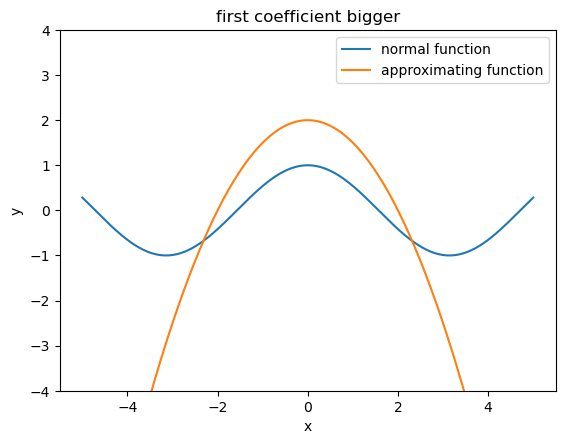

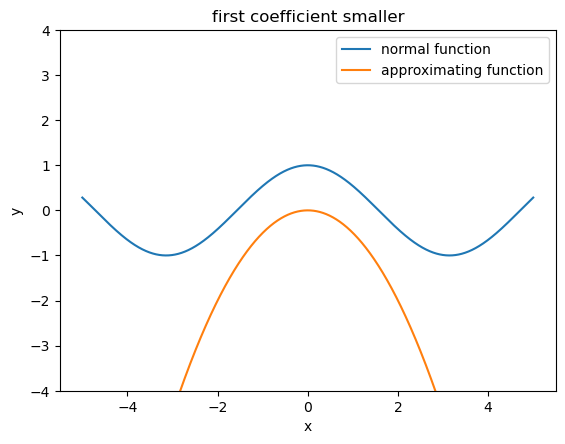

In [4]:
plot_two_functions(lambda x: np.cos(x), "normal function", lambda x: 2 - x ** 2 / 2, "approximating function", "first coefficient bigger")
plot_two_functions(lambda x: np.cos(x), "normal function", lambda x: 0 - x ** 2 / 2, "approximating function", "first coefficient smaller")

From the examples above, we can conclude that when we change the value of the first coefficient, the position of the graph of the function moves up and down (up for bigger values and down for smaller values).

So now that we know the first coefficient fixes the y position of the graph, let's try changing the second coefficient

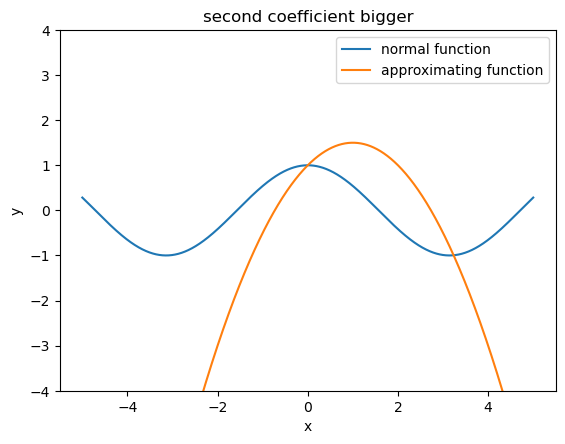

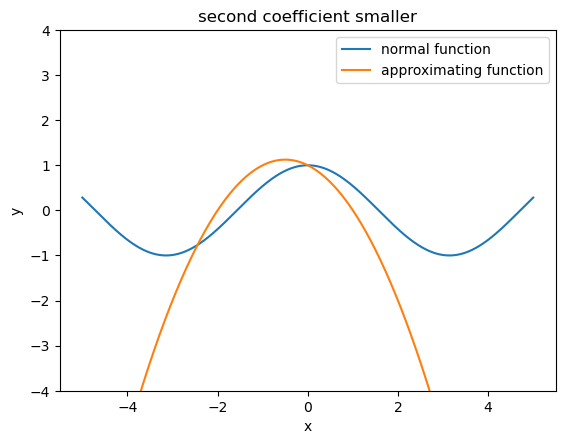

In [5]:
plot_two_functions(lambda x: np.cos(x), "normal function", lambda x: 1 + 1 * x - x ** 2 / 2, "approximating function", "second coefficient bigger")
plot_two_functions(lambda x: np.cos(x), "normal function", lambda x: 1 - 0.5 * x - x ** 2 / 2, "approximating function", "second coefficient smaller")

It's clear that the graph moves to the right for bigger values of the seccond coefficient and left for smaller values. So we can say that the second coefficient fixes the x position of the graph.

Now let's move on and try changing the third coefficient.

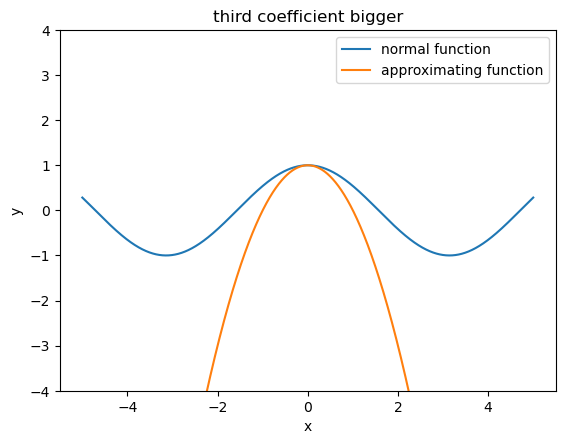

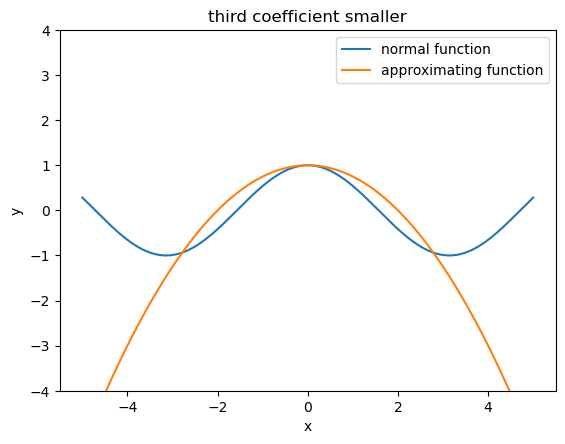

In [6]:
plot_two_functions(lambda x: np.cos(x), "normal function", lambda x: 1 - x ** 2, "approximating function", "third coefficient bigger")
plot_two_functions(lambda x: np.cos(x), "normal function", lambda x: 1 - x ** 2 / 4, "approximating function", "third coefficient smaller")

And as we expected, the third coefficient fixes the width of the graph of the function. For bigger values, it gets wider and for smaller values it gets thinner

And with all these options we can create every single graph of a quadratic equation. If we want to make it go lower or higher, we simply change the first coefficient. If we want it to go to the left or to the right we change the second coefficient and the last thing we can change in the graph of a quadratic equation is its width for which we change the third coefficient. And the thing taylor series do is to find the best values of the coefficients (settings) for which the graph of the function approximates the best the given function.

As a conclusion, we can say that the zero-th derivative (the first coefficient) gives us the height of the graph, the first derivative gives us the slope of the function, the second derivative gives us information about the curviture of the function and higher derivatives create more curves in the graph.

For our example with $\cos{x}$ and three terms, it's $$\cos{x} \approx 1 - \frac{x^{2}}{2}$$

And the graph looks like this

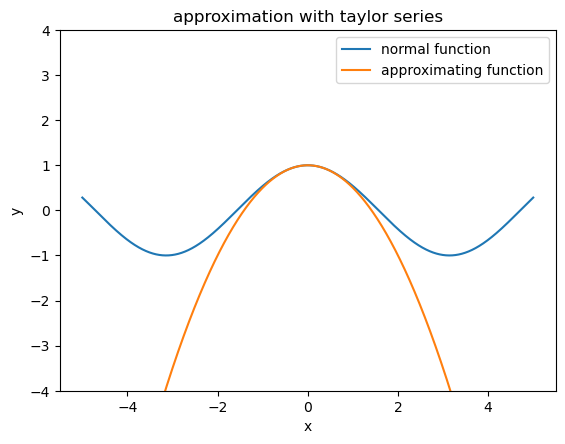

In [7]:
plot_two_functions(lambda x: np.cos(x), "normal function", lambda x: 1 - x ** 2 / 2, "approximating function", "approximation with taylor series")

### Is the approximation good enough?

You can see here how the function is approximated near the point zero and gets really different when we get further from that point

Now let's see some examples of the difference between the two functions

In [8]:
print("Difference at point 0: " + str(np.cos(0) - (1 - 0 ** 2 / 2)))
print("Difference at point 0.5: " + str(np.cos(0.5) - (1 - 0.5 ** 2 / 2)))
print("Difference at point 1: " + str(np.cos(1) - (1 - 1 ** 2 / 2)))
print("Difference at point 2: " + str(np.cos(2) - (1 - 2 ** 2 / 2)))
print("Difference at point 5: " + str(np.cos(5) - (1 - 5 ** 2 / 2)))

Difference at point 0: 0.0
Difference at point 0.5: 0.0025825618903727587
Difference at point 1: 0.040302305868139765
Difference at point 2: 0.5838531634528576
Difference at point 5: 11.783662185463227


Now let's plot the difference of both funcitons

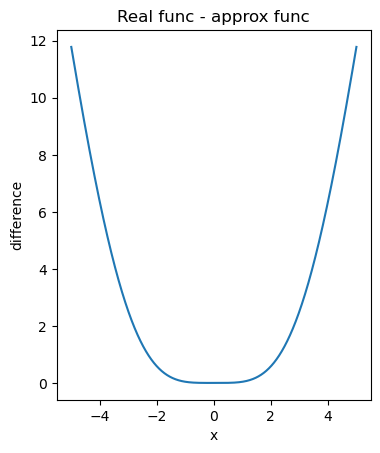

In [9]:
x = np.linspace(-5, 5, 5000)
y = np.cos(x)
y_approx = 1 - x ** 2 / 2
y_diff = y - y_approx # creating y_diff to plot the difference of both functions
plt.plot(x, y_diff) # plotting the difference
plt.xlabel("x") # labeling the x axis
plt.ylabel("difference") # labeling the y axis
plt.gca().set_aspect("equal") # setting the aspects of x and y equal (for better visualisation)
plt.title("Real func - approx func") # giving the plot a title
plt.show() # showing the plot

Here we can see how the difference of the two functions near the point 0 is really close or equal to 0, but when we look more to the right or to the left, things are not how we expected them to be. Well, here comes the rule bigger numbers, better result. This means that if we want to have a better approximation, we need to add more terms to the approximating function.

### The number of terms

Let's create a function to help us understand how the different number of terms changes our approximation.

Eq(f(x), sin(x))

Eq(T(x), -x**3/6 + x)

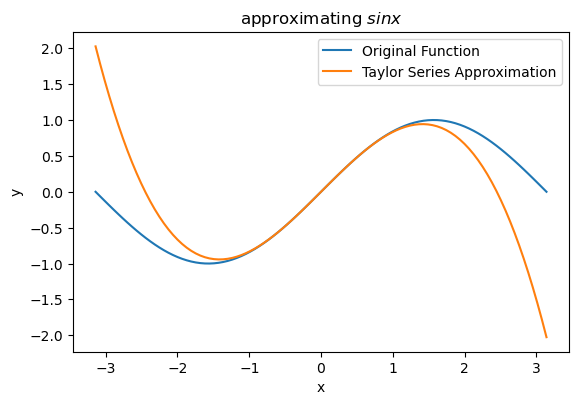

In [10]:
# creating the taylor series and displaying it
def taylor_approximation(f, terms, x_var): # NOTE: we are using sympy functions, so if you input something else, it will throw an error
    """
    Arguments:
    1. f - the function we want to approximate
    2. terms - the number of terms we want our approximation to have
    x_var - the variable we use to display our results
    
    Returns:
    the taylor series of the function with the specified number of terms
    """
    taylor_series = 0.0 # creating the taylor series (starting at 0)
    series_terms = [] # creating the series of terms, so that we can display the generated taylor series at the end
    for n in range(terms): # for each term
        derivative = f.diff(x_var, n) # we get its n-th derivative
        term = (derivative.subs(x_var, 0) * x_var ** n) / sp.factorial(n) # we create the term
        taylor_series += term # we add it to the taylor series
        series_terms.append(sp.latex(term)) # and to the list of terms
    # After we are done with all the terms
    series_latex = " + ".join(series_terms) # we join all the terms with a plus sign
    display(sp.Eq(sp.Symbol('f(x)'), f)) # we display the normal function
    display(sp.Eq(sp.Symbol('T(x)'), taylor_series)) # and the taylor series that approximates it
    return taylor_series # we return the taylor series, so we can plot it

# plotting both functions (the normal and the approximated one)
def plot_taylor_approximation(f, terms, x_range, x_var, plot_title): # As parameters, it takes the function we want to approximate, the number of terms, the range of the x values (a python list [start, end]), the sympy symbol we are using and the title of the plot

    """
    Arguments:
    it takes the same arguments as the taylor_approximation function, because it calls it inside itself
    In addition it takes two more arguments for the plot
    1. x_range - a list/tuple which specifies the minimum value of x and the maximum value of x respectively
    2. plot_title - the title of the plot
    
    plots the taylor series approximation of a function
    """
    # Converting the symbolic function to a numerical function for plotting
    function = sp.lambdify(x_var, f, 'numpy')
    approximation = sp.lambdify(x_var, taylor_approximation(f, terms, x_var), 'numpy')

    # Generating the x values for plotting
    x_vals = np.linspace(x_range[0], x_range[1], 100)

    # Evaluating the original function and the Taylor series approximation
    actual_vals = function(x_vals)
    approximation_vals = approximation(x_vals)

    # Plotting the original function and the Taylor series approximation
    plt.plot(x_vals, actual_vals, label='Original Function')
    plt.plot(x_vals, approximation_vals, label='Taylor Series Approximation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect("equal")
    plt.title(plot_title)
    plt.legend()
    plt.show()

x_var = sp.Symbol('x') # creating the symbol x with sympy
# Examples
plot_taylor_approximation(sp.sin(x_var), 5, (-np.pi, np.pi), x_var, "approximating $sin{x}$")

OK, so now that it works, let's try some examples. What if we try to approximate the same function, but with more terms. Let's say 10.

Eq(f(x), sin(x))

Eq(T(x), x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x)

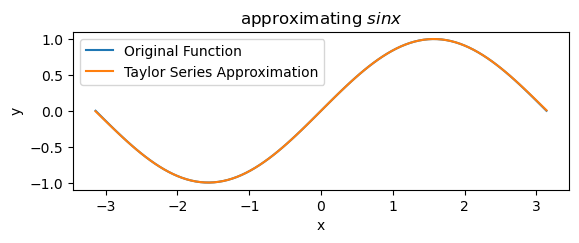

In [11]:
plot_taylor_approximation(sp.sin(x_var), 10, (-np.pi, np.pi), x_var, "approximating $sin{x}$")

WOW! It looks like we completely approximated the function. Let's see what happens outside the given x range

Eq(f(x), sin(x))

Eq(T(x), x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x)

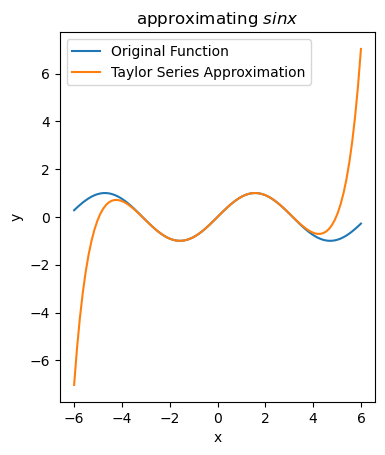

In [12]:
plot_taylor_approximation(sp.sin(x_var), 10, (-6, 6), x_var, "approximating $sin{x}$")

Well, not pretty much, but it's better than before :]. This comes to prove the rule for the large numbers, the more terms we have, the better the approximation will get. But can we fully approximate a function and how do we do that?

Well, as we mentioned in the beginning the taylor series is an infinite sum of terms, so to get the best approximation of a function we need to do infinitely many calculations, which is not possible for a computer.

### Taylor and Maclauren series

Sooooo... I have to tell you something, I have actually lied to you. This is not the full taylor series! We have actually been looking at a specific case of the taylor series, which is called Maclaurin series and it's basically a taylor series, but we are trying to approximate a given function near the point zero.

Remember in the start when I told you that the taylor series approximated a function near a given point. That's the only thing we need to add to get the full form of the taylor series

So how does the full taylor series look like. It's the following: $$f(x) = \sum\limits_{n=0}^\infty \frac{f^{(n)}(a)(x - a)^{n}}{!n}$$

where $a$ is the point near which we want to approximate the function

From this we get $$c_n = \frac{f^{(n)}(a)(x - a)^{n}}{!n}$$

Let's look at some examples, but first, we have to update our function to work with the full taylor series

Eq(f(x), sin(x) - cos(x))

Eq(T(x), -x**4/24 - x**3/6 + x**2/2 + x - 1.0)

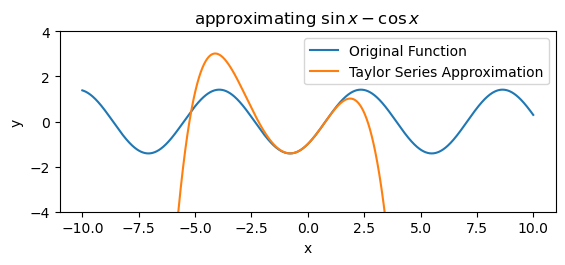

In [13]:
# creating the full taylor series and displaying it
def full_taylor_approximation(f, terms, x_var, x_val): # Note that we are still using sympy functions
    """
    Arguments:
    It takes the same arguments as the previous function except x_val - the point near which we want to approximate our function
    
    Returns:
    the taylor series approximation of a funciton near some point
    """
    taylor_series = 0.0 # creating the taylor series (starting at 0)
    series_terms = [] # creating the series of terms, so that we can display the generated taylor series at the end
    for n in range(terms): # for each term
        derivative = f.diff(x_var, n) # we get its n-th derivative
        term = (derivative.subs(x_var, x_val) * (x_var - x_val) ** n) / sp.factorial(n) # we create the term
        taylor_series += term # we add it to the taylor series
        series_terms.append(sp.latex(term)) # and to the list of terms
    # After we are done with all the terms
    series_latex = " + ".join(series_terms) # we join all the terms with a plus sign
    display(sp.Eq(sp.Symbol('f(x)'), f)) # we display the normal function
    display(sp.Eq(sp.Symbol('T(x)'), taylor_series)) # and the taylor series that approximates it
    return taylor_series # we return the taylor series, so we can plot it

# plotting both functions (the normal and the approximated one)
def plot_full_taylor_approximation(f, terms, x_range, y_range, x_var, x_val, plot_title): # As parameters, it takes the function we want to approximate, the number of terms, the range of the x values (a python list [start, end]), the sympy symbol we are using and the title of the plot
    """
    Arguments:
    It takes the same arguments from the plot_taylor_series function. In addition:
    1. y_range -  a list/tuple which specifies the minimum value of y and the maximum value of y respectively
    2. x_val - the point near which we want to approximate our function
    
    It plots the taylor series approximation of a function
    """

    # Converting the symbolic function to a numerical function for plotting
    function = sp.lambdify(x_var, f, 'numpy')
    approximation = sp.lambdify(x_var, full_taylor_approximation(f, terms, x_var, x_val), 'numpy')

    # Generating the x values for plotting
    x_vals = np.linspace(x_range[0], x_range[1], 5000)

    # Evaluating the original function and the Taylor series approximation
    actual_vals = function(x_vals)
    approximation_vals = approximation(x_vals)

    # Plotting the original function and the Taylor series approximation
    plt.plot(x_vals, actual_vals, label='Original Function')
    plt.plot(x_vals, approximation_vals, label='Taylor Series Approximation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(y_range[0], y_range[1])
    plt.gca().set_aspect("equal")
    plt.title(plot_title)
    plt.legend()
    plt.show()

x_var = sp.Symbol('x') # creating the symbol x with sympy
# Examples
plot_full_taylor_approximation(sp.sin(x_var) - sp.cos(x_var), 5, (-10, 10), (-4, 4), x_var, 0, "approximating $\sin{x} - \cos{x}$")

Now we are ready to see the examples.

Eq(f(x), sin(x) - cos(x))

Eq(T(x), (x + 5)**4*(-cos(5) - sin(5))/24 + (x + 5)**3*(sin(5) - cos(5))/6 + (x + 5)**2*(sin(5) + cos(5))/2 + (x + 5)*(cos(5) - sin(5)) - cos(5) - sin(5))

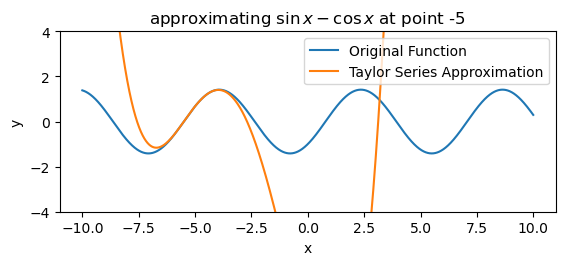

In [14]:
plot_full_taylor_approximation(sp.sin(x_var) - sp.cos(x_var), 5, (-10, 10), (-4, 4), x_var, -5, "approximating $\sin{x} - \cos{x}$ at point -5")

Eq(f(x), sin(x) - cos(x))

Eq(T(x), (x + 2)**4*(-sin(2) - cos(2))/24 + (x + 2)**3*(-cos(2) + sin(2))/6 + (x + 2)**2*(cos(2) + sin(2))/2 + (x + 2)*(-sin(2) + cos(2)) - sin(2) - cos(2))

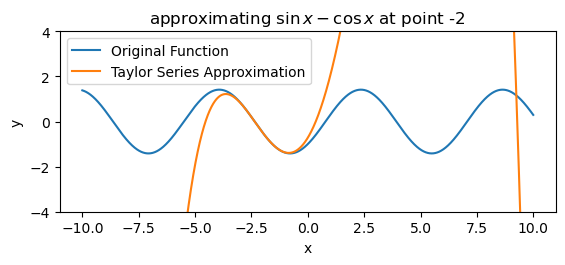

In [15]:
plot_full_taylor_approximation(sp.sin(x_var) - sp.cos(x_var), 5, (-10, 10), (-4, 4), x_var, -2, "approximating $\sin{x} - \cos{x}$ at point -2")

Eq(f(x), sin(x) - cos(x))

Eq(T(x), -x**4/24 - x**3/6 + x**2/2 + x - 1.0)

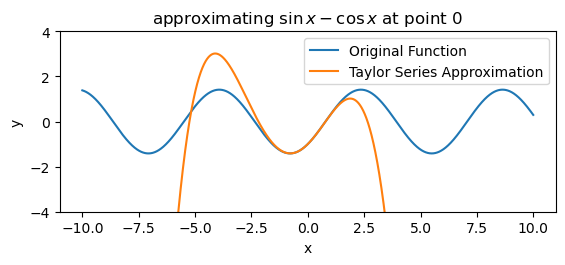

In [16]:
plot_full_taylor_approximation(sp.sin(x_var) - sp.cos(x_var), 5, (-10, 10), (-4, 4), x_var, 0, "approximating $\sin{x} - \cos{x}$ at point 0")

Eq(f(x), sin(x) - cos(x))

Eq(T(x), -1.0*x + 4.05871212641677*(0.318309886183791*x - 1)**4 + 5.16771278004997*(0.318309886183791*x - 1)**3 - 4.93480220054468*(0.318309886183791*x - 1)**2 + 4.14159265358979)

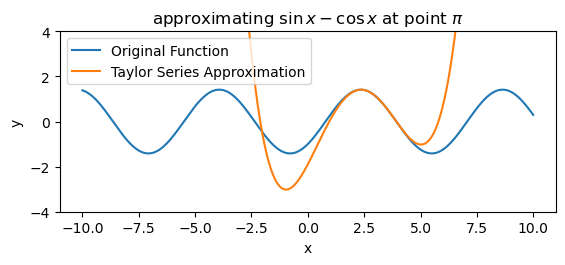

In [17]:
plot_full_taylor_approximation(sp.sin(x_var) - sp.cos(x_var), 5, (-10, 10), (-4, 4), x_var, np.pi, "approximating $\sin{x} - \cos{x}$ at point $\pi$")

Eq(f(x), sin(x) - cos(x))

Eq(T(x), (x - 6)**4*(-cos(6) + sin(6))/24 + (x - 6)**3*(-cos(6) - sin(6))/6 + (x - 6)**2*(-sin(6) + cos(6))/2 + (x - 6)*(sin(6) + cos(6)) - cos(6) + sin(6))

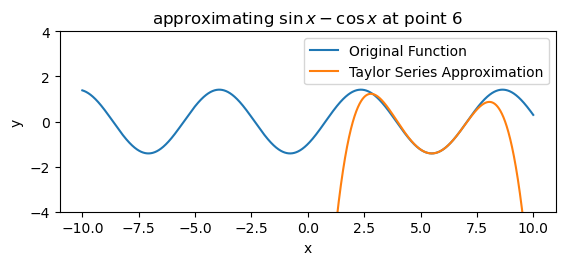

In [18]:
plot_full_taylor_approximation(sp.sin(x_var) - sp.cos(x_var), 5, (-10, 10), (-4, 4), x_var, 6, "approximating $\sin{x} - \cos{x}$ at point 6")

We can play a lot with this and see that it works even if we change the number of terms

Eq(f(x), sin(x) - cos(x))

Eq(T(x), (x - 5)**9*(sin(5) + cos(5))/362880 + (x - 5)**8*(sin(5) - cos(5))/40320 + (x - 5)**7*(-cos(5) - sin(5))/5040 + (x - 5)**6*(cos(5) - sin(5))/720 + (x - 5)**5*(sin(5) + cos(5))/120 + (x - 5)**4*(sin(5) - cos(5))/24 + (x - 5)**3*(-cos(5) - sin(5))/6 + (x - 5)**2*(cos(5) - sin(5))/2 + (x - 5)*(sin(5) + cos(5)) + sin(5) - cos(5))

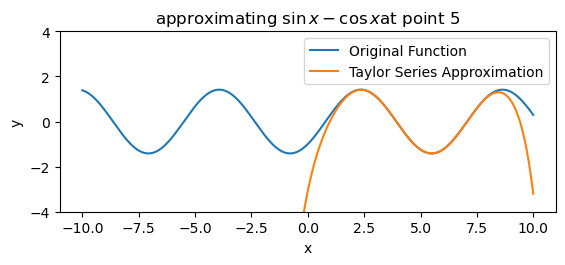

In [19]:
plot_full_taylor_approximation(sp.sin(x_var) - sp.cos(x_var), 10, (-10, 10), (-4, 4), x_var, 5, "approximating $\sin{x} - \cos{x}$at point 5")

It does look pretty cool and fun to play with, but we have other things to talk about, like error bounds.

### Error Bounds and maximum error

First, we have to define what error bounds are. As some of you might have assumed, it measures how different both functions are (the approximating and the normal one). When we think of an error, we sometimes associate it with a deviation (mostly in this case when we are talking about graphs and taylor series) and it measures the difference between the two function at some point. Now you will say "Yeah, but didn't we see that in a previous example. When we subtracted the approximation and the real function at some point.", yeah, and that is basically it, but now we will see how to find the maximum error.

Knowing that $$|Error_n| \le |\frac{M(x - a)^{n + 1}}{(n + 1)!}|$$

Where n is the degree of the polynomial that approximates the function, a is the point near which we approximated the function and x is the point near which we are looking for errors. We'll talk about M later.

We know what the error is and we can subtitute it with $T(x) - f(x)$ where $T(x)$ is the approximating function (T comes from Taylor :]) $$|T(x) - f(x)| \le |\frac{M(x - a)^{n + 1}}{(n + 1)!}|$$

Now I know it looks like a mess, but I will cover the right-side term in just a second

So let's recap what we were looking for. We were looking for the maximum error, the error bound. It's easy to guess that we are just going to look at the case of equality $$|T(x) - f(x)| = |\frac{M(x - a)^{n + 1}}{(n + 1)!}|$$

It still looks like a mess, but... bare with me.

We can now get rid of the modules, because they were only required when we had inequality $$T(x) - f(x) = \frac{M(x - a)^{n + 1}}{(n + 1)!}$$

And I don't think $T(x)$ and $f(x)$ are relevant anymore, so let's subtitute them with $R_n$ which means the maximum error or error bound. The index shows what order is our approximating function (the degree of the polynomial or the number of terms in some way). $$R_n = \frac{M(x - a)^{n + 1}}{(n + 1)!}$$

So now that we've simplified the left side, let's start with the right side

What does M mean? In fact, it was the only thing that made the inequality, it's the ony variable that we could change and it affected the whole error. We can subtitute it with $f^{n + 1}(z)$ $$R_n = \frac{f^{n + 1}(z)(x - a)^{n + 1}}{(n + 1)!}$$

I know what you're thinking right now "Didn't we want to simplify the right side. We just added another variable". Well that is the variable that affected the error and to get the biggest value of an error, we need to get the biggest value of $f^{n + 1}(z)$

Firstly we know that $z$ is in the interval $[a, x]$

So when we want to find the biggest value of $f^{n + 1}(z)$ we first need to compute the (n + 1)th derivative, then find the value of $z$ in the interval $[a, x]$ for which $f^{n + 1}(z)$ is the biggest.

Let's try looking through some examples. Aaaand we need to write more code 

In [20]:
def calculate_max_error(original_function, expansion_point, degree, evaluation_point): # the function must be sympy
    """
    Calculates the maximum error in a Taylor series approximation at a given evaluation point using the Lagrange form of the remainder.

    Arguments:
    1. original_function: The original function for which the approximation is being made.
    2. expansion_point: The point around which the Taylor series is centered.
    3. degree: The degree of the Taylor series approximation.
    4. evaluation_point: The point at which the maximum error is being evaluated.

    Returns:
    The maximum error in the Taylor series approximation at the specified evaluation point.
    """
    # creating the variables as we talked about above for better visualization
    x = sp.symbols('x')
    f = original_function
    n = degree
    a = expansion_point

    # Calculate the (n+1)-th derivative of the original function
    f_derivative = sp.diff(f, x, n+1)

    # Find the maximum value of the derivative within the interval
    derivative_max = sp.Max(f_derivative, x, a, evaluation_point)

    # Calculate the Lagrange form of the remainder
    remainder = derivative_max * (x - a)**(n+1) / sp.factorial(n+1)

    # Evaluate the maximum error at the evaluation point
    max_error = sp.Abs(remainder.subs(x, evaluation_point)).evalf()

    return max_error



Now let's try the previous example with $\cos{x}$, center of approximation 0 and degree 2

In [21]:
x = sp.Symbol("x")
print("At point 0: " + str(calculate_max_error(sp.cos(x), 0, 2, 0)))
print("At point 0.5: " + str(calculate_max_error(sp.cos(x), 0, 2, 0.5)))
print("At point 1: " + str(calculate_max_error(sp.cos(x), 0, 2, 1)))
print("At point 2: " + str(calculate_max_error(sp.cos(x), 0, 2, 2)))
print("At point 5: " + str(calculate_max_error(sp.cos(x), 0, 2, 5)))

At point 0: 0
At point 0.5: 0.0104166666666667
At point 1: 0.166666666666667
At point 2: 2.66666666666667
At point 5: 104.166666666667


And now let's compare

In [22]:
print("Difference at point 0: " + str(np.cos(0) - (1 - 0 ** 2 / 2)))
print("Difference at point 0.5: " + str(np.cos(0.5) - (1 - 0.5 ** 2 / 2)))
print("Difference at point 1: " + str(np.cos(1) - (1 - 1 ** 2 / 2)))
print("Difference at point 2: " + str(np.cos(2) - (1 - 2 ** 2 / 2)))
print("Difference at point 5: " + str(np.cos(5) - (1 - 5 ** 2 / 2)))

Difference at point 0: 0.0
Difference at point 0.5: 0.0025825618903727587
Difference at point 1: 0.040302305868139765
Difference at point 2: 0.5838531634528576
Difference at point 5: 11.783662185463227


It's clear that the examples we are looking at are way smaller than the maximum errors

If you don't think this example proves it, feel free to play with the numbers and see what happens

### Convergence and divergence

First we need to define what means for a function to converge or diverge.

A Taylor series approximation of a funciton converges when it perfectly describes the whole function as the number of terms approach infinity Or in more mathematical speak

if number of terms approach $\infty$ and $R_n$ approaches 0, then we say that the funciton converges, where, as we talked about, $R_n$ means an error. So what we are saying is that a function converges when we can completely describe it with an infinite series of terms.

As I mentioned at the start, when a function diverges, we can't describe it completely, even with an infinite sum of terms.

Let's look at an example

Let's take the function $f(x) = \frac{1}{1 - x}$

Eq(f(x), 1/(1 - x))

Eq(T(x), x**2 + x + 1.0)

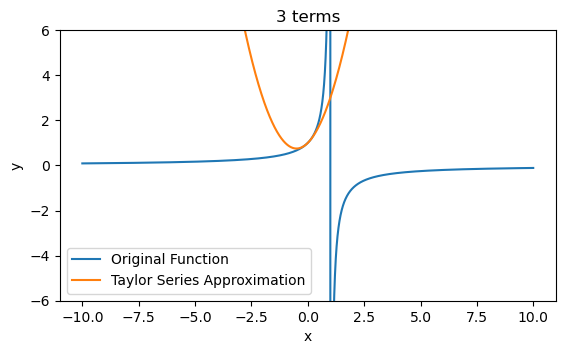

Eq(f(x), 1/(1 - x))

Eq(T(x), x**4 + x**3 + x**2 + x + 1.0)

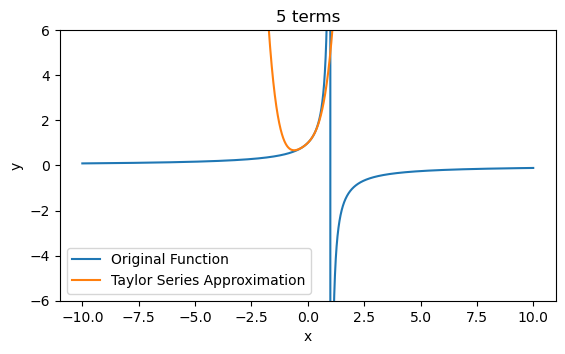

Eq(f(x), 1/(1 - x))

Eq(T(x), x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x + 1.0)

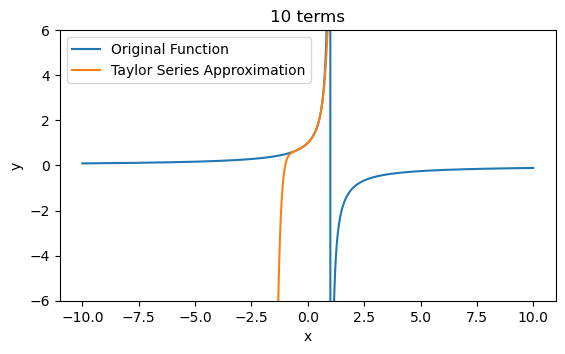

Eq(f(x), 1/(1 - x))

Eq(T(x), x**14 + x**13 + x**12 + x**11 + x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x + 1.0)

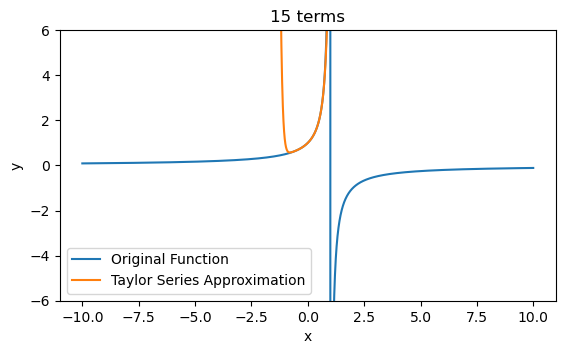

Eq(f(x), 1/(1 - x))

Eq(T(x), x**29 + x**28 + x**27 + x**26 + x**25 + x**24 + x**23 + x**22 + x**21 + x**20 + x**19 + x**18 + x**17 + x**16 + x**15 + x**14 + x**13 + x**12 + x**11 + x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x + 1.0)

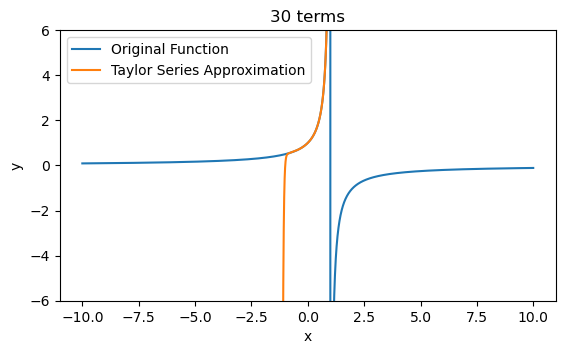

Eq(f(x), 1/(1 - x))

Eq(T(x), x**49 + x**48 + x**47 + x**46 + x**45 + x**44 + x**43 + x**42 + x**41 + x**40 + x**39 + x**38 + x**37 + x**36 + x**35 + x**34 + x**33 + x**32 + x**31 + x**30 + x**29 + x**28 + x**27 + x**26 + x**25 + x**24 + x**23 + x**22 + x**21 + x**20 + x**19 + x**18 + x**17 + x**16 + x**15 + x**14 + x**13 + x**12 + x**11 + x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x + 1.0)

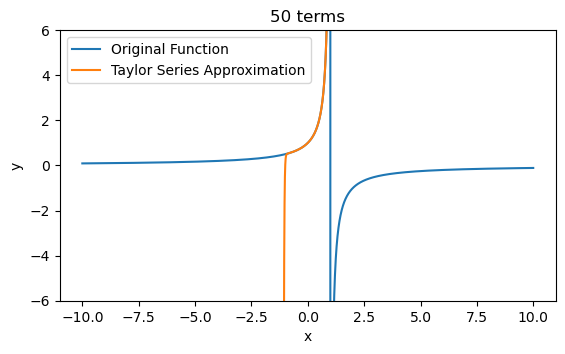

In [23]:
x_var = sp.Symbol("x")
plot_full_taylor_approximation(1 / (1 - x_var), 3, [-10, 10], [-6, 6], x_var, 0, "3 terms")
plot_full_taylor_approximation(1 / (1 - x_var), 5, [-10, 10], [-6, 6], x_var, 0, "5 terms")
plot_full_taylor_approximation(1 / (1 - x_var), 10, [-10, 10], [-6, 6], x_var, 0, "10 terms")
plot_full_taylor_approximation(1 / (1 - x_var), 15, [-10, 10], [-6, 6], x_var, 0, "15 terms")
plot_full_taylor_approximation(1 / (1 - x_var), 30, [-10, 10], [-6, 6], x_var, 0, "30 terms")
plot_full_taylor_approximation(1 / (1 - x_var), 50, [-10, 10], [-6, 6], x_var, 0, "50 terms")

As you can see, we are not even close to approximating the whole function. Some of you might say "What if we just need more terms". When we look at the examples, we can see that the approximation just goes nowhere. I starts jumping up and down and getting more and more dteeper. When you see this you are sure that this approximation diverges

## Modeling

We have gone through 2 different functions that helped us make examples, visualize the things we did and help us understand Taylor series.

The first function started from plotting two functions and because of several updates of the function, now we have this

In [24]:
# creating the full taylor series and displaying it
def full_taylor_approximation(f, terms, x_var, x_val): # Note that we are still using sympy functions
    """
    Arguments:
    1. f - the function we want to approximate
    2. terms - the number of terms we want our approximation to have
    3. x_var - the variable we use to display our results
    4. x_val - the point near which we want to approximate the function
    
    Returns:
    the taylor series approximation of a funciton near some point
    """
    taylor_series = 0.0 # creating the taylor series (starting at 0)
    series_terms = [] # creating the series of terms, so that we can display the generated taylor series at the end
    for n in range(terms): # for each term
        derivative = f.diff(x_var, n) # we get its n-th derivative
        term = (derivative.subs(x_var, x_val) * (x_var - x_val) ** n) / sp.factorial(n) # we create the term
        taylor_series += term # we add it to the taylor series
        series_terms.append(sp.latex(term)) # and to the list of terms
    # After we are done with all the terms
    series_latex = " + ".join(series_terms) # we join all the terms with a plus sign
    display(sp.Eq(sp.Symbol('f(x)'), f)) # we display the normal function
    display(sp.Eq(sp.Symbol('T(x)'), taylor_series)) # and the taylor series that approximates it
    return taylor_series # we return the taylor series, so we can plot it

# plotting both functions (the normal and the approximated one)
def plot_full_taylor_approximation(f, terms, x_range, y_range, x_var, x_val, plot_title): # As parameters, it takes the function we want to approximate, the number of terms, the range of the x values (a python list [start, end]), the sympy symbol we are using and the title of the plot
    """
    Arguments:
     1. f - the function we want to approximate
    2. terms - the number of terms we want our approximation to have
    3. y_range -  a list/tuple which specifies the minimum value of y and the maximum value of y respectively
    4. x_range -  a list/tuple which specifies the minimum value of x and the maximum value of x respectively
    5. x_var - the variable we use to display our results
    6. x_val - the point near which we want to approximate our function
    7. plot_title - the title of the plolt
    
    It plots the taylor series approximation of a function
    """

    # Converting the symbolic function to a numerical function for plotting
    function = sp.lambdify(x_var, f, 'numpy')
    approximation = sp.lambdify(x_var, full_taylor_approximation(f, terms, x_var, x_val), 'numpy')

    # Generating the x values for plotting
    x_vals = np.linspace(x_range[0], x_range[1], 5000)

    # Evaluating the original function and the Taylor series approximation
    actual_vals = function(x_vals)
    approximation_vals = approximation(x_vals)

    # Plotting the original function and the Taylor series approximation
    plt.plot(x_vals, actual_vals, label='Original Function')
    plt.plot(x_vals, approximation_vals, label='Taylor Series Approximation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(y_range[0], y_range[1])
    plt.gca().set_aspect("equal")
    plt.title(plot_title)
    plt.legend()
    plt.show()

x_var = sp.Symbol('x') # creating the symbol x with sympy

Eq(f(x), sin(cos(x)))

Eq(T(x), (x - 5)**29*(-50390670759797256681*sin(5)**8*cos(cos(5)) - 7144101392809138758000*sin(5)**6*cos(5)**4*cos(cos(5)) - 4809089932620834635775*sin(5)**4*cos(5)**4*cos(cos(5)) - 37545745188682163290*sin(5)**10*cos(cos(5)) - 4717821553431412526100*sin(5)**6*sin(cos(5))*cos(5)**3 - 2469243067784359366500*sin(5)**8*sin(cos(5))*cos(5)**3 - 2084661771896449746000*sin(5)**8*cos(5)**4*cos(cos(5)) - 1473452421274145362050*sin(5)**4*sin(cos(5))*cos(5)**3 - 9978304519004079804*sin(5)**6*cos(cos(5)) - 7107482461832121915*sin(5)**12*cos(cos(5)) - 317902334881187306250*sin(5)**2*cos(5)**4*cos(cos(5)) - 337193689480404079050*sin(5)**10*sin(cos(5))*cos(5)**3 - 174419294057247125250*sin(5)**10*cos(5)**4*cos(cos(5)) - 463233842239734600*sin(5)**14*cos(cos(5)) - 31016948632368827310*sin(5)**2*sin(cos(5))*cos(5)**3 - 3934354814458061994000*sin(5)**4*sin(cos(5))*cos(5)**7 - 3014005530273158421000*sin(5)**2*sin(cos(5))*cos(5)**7 - 97012589464171291*sin(5)**4*cos(cos(5)) - 1868098207984180672500*sin(5)*

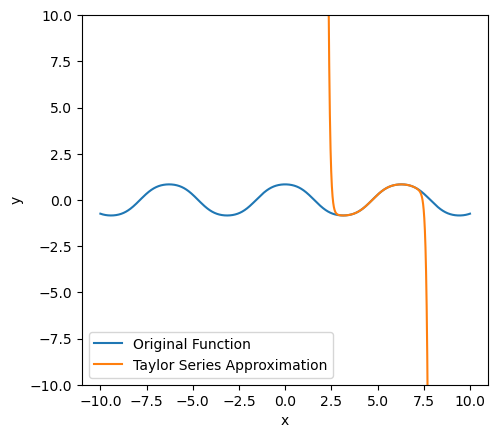

In [31]:
# Playground :] :
plot_full_taylor_approximation(sp.sin(sp.cos(x_var)), 30, [-10, 10], [-10, 10], x_var, 5, "")

The second function we made, estimated the maximum error of an approximation of a function

In [ ]:
def calculate_max_error(original_function, expansion_point, degree, evaluation_point): # the function must be sympy
    """
    Calculates the maximum error in a Taylor series approximation at a given evaluation point using the Lagrange form of the remainder.

    Arguments:
    1. original_function: The original function for which the approximation is being made.
    2. expansion_point: The point around which the Taylor series is centered.
    3. degree: The degree of the Taylor series approximation.
    4. evaluation_point: The point at which the maximum error is being evaluated.

    Returns:
    The maximum error in the Taylor series approximation at the specified evaluation point.
    """
    # creating the variables as we talked about above for better visualization
    x = sp.symbols('x')
    f = original_function
    n = degree
    a = expansion_point

    # Calculate the (n+1)-th derivative of the original function
    f_derivative = sp.diff(f, x, n+1)

    # Find the maximum value of the derivative within the interval
    derivative_max = sp.Max(f_derivative, x, a, evaluation_point)

    # Calculate the Lagrange form of the remainder
    remainder = derivative_max * (x - a)**(n+1) / sp.factorial(n+1)

    # Evaluate the maximum error at the evaluation point
    max_error = sp.Abs(remainder.subs(x, evaluation_point)).evalf()

    return max_error

In [ ]:
# Playground:

## References

* 3 blue 1 brown: https://www.youtube.com/@3blue1brown - helped with his videos for taylor series
* The organic chemistry tutor: https://www.youtube.com/@TheOrganicChemistryTutor - helped with error bounds and maximum errors
* https://www.mathsisfun.com/algebra/taylor-series.html
* https://en.wikipedia.org/wiki/Taylor_series
* And mostly the help of chatgpt :]